In [1]:
import sys

sys.path.append("../")
import penaltyblog as pb

In [2]:
df = pb.footballdata.fetch_data("england", 2021, 0)
df.tail()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
292,E0,2022-04-02,15:00,Leeds,Southampton,1,1,D,1,0,...,2.32,0.00,1.79,2.11,1.83,2.10,1.85,2.14,1.80,2.09
293,E0,2022-04-02,15:00,Wolves,Aston Villa,2,1,H,2,0,...,1.57,0.25,1.75,2.05,1.76,2.19,1.81,2.20,1.75,2.15
294,E0,2022-04-02,17:30,Man United,Leicester,1,1,D,0,0,...,2.34,-1.00,1.90,2.00,1.93,2.00,2.10,2.00,1.95,1.92
295,E0,2022-04-03,14:00,West Ham,Everton,2,1,H,1,0,...,1.93,-0.75,2.06,1.84,2.04,1.88,2.23,1.88,2.04,1.84
296,E0,2022-04-03,16:30,Tottenham,Newcastle,5,1,H,1,1,...,2.07,-1.00,1.97,1.93,1.97,1.95,2.00,2.04,1.94,1.93


In [3]:
pb.massey.ratings(df["FTHG"], df["FTAG"], df["HomeTeam"], df["AwayTeam"])

,team,rating,offence,defence
0,Liverpool,1.760668,1.815761,-0.055093
1,Man City,1.652764,1.599467,0.053297
2,Chelsea,1.190504,1.308331,-0.117826
3,Tottenham,0.481144,1.02615,-0.545005
4,Arsenal,0.462375,0.881154,-0.418778
5,West Ham,0.310031,0.910342,-0.600311
6,Man United,0.225005,0.918853,-0.693847
7,Crystal Palace,0.133044,0.722732,-0.589688
8,Wolves,0.132882,0.298875,-0.165992
9,Leicester,-0.03267,0.921622,-0.954292


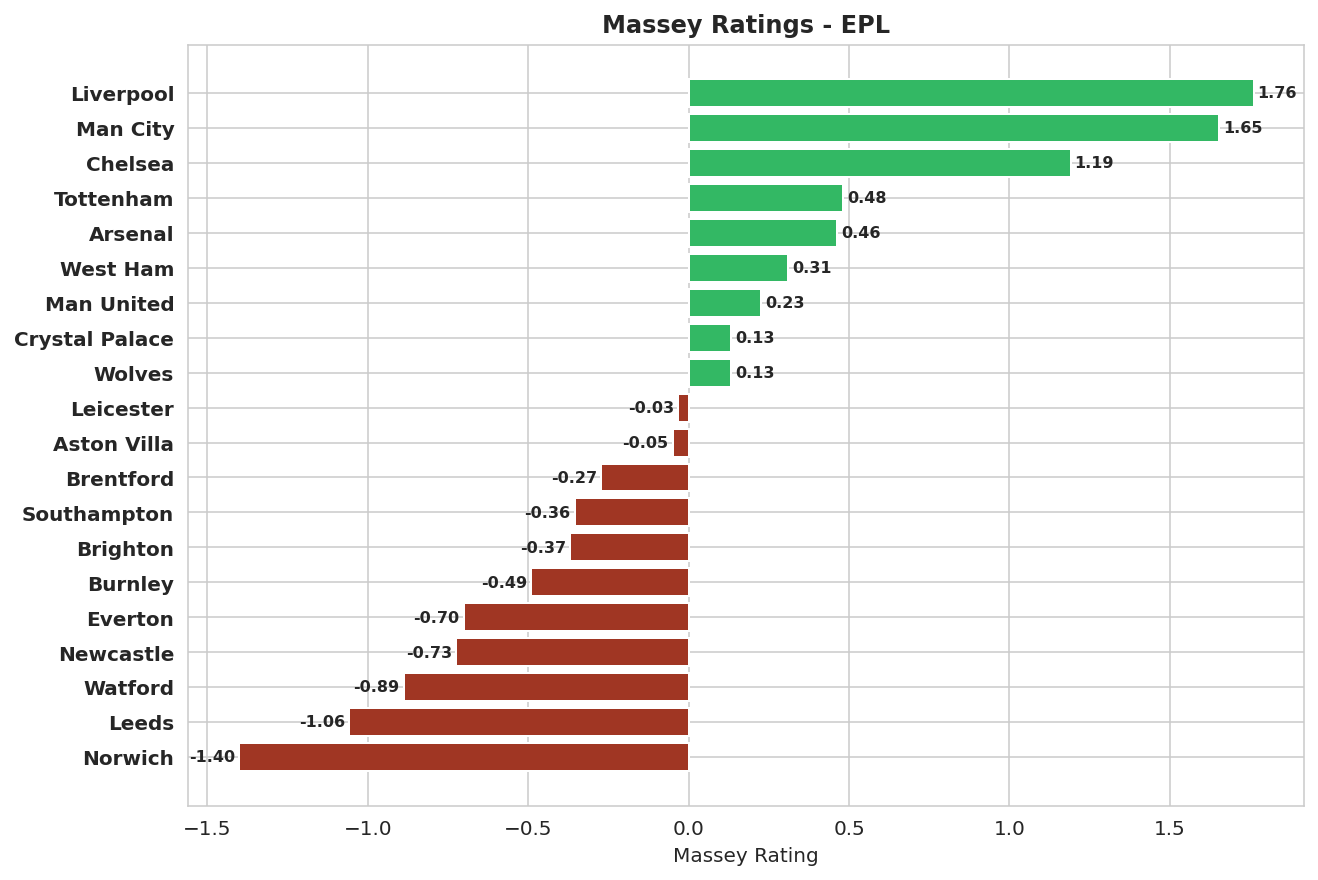

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = [10, 7]
sns.set_style("whitegrid")

ratings = pb.massey.ratings(df["FTHG"], df["FTAG"], df["HomeTeam"], df["AwayTeam"])
ratings["colours"] = np.where(ratings["rating"]> 0, "#33b864", "#a03623")
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["rating"]
ax.barh(y_pos, performance, align='center', color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel('Massey Rating')
ax.set_title('Massey Ratings - EPL', fontweight="bold")

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 2
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,
        fontsize=8, fontweight="bold")                      # Horizontally align label differently for
                                    # positive and negative values.

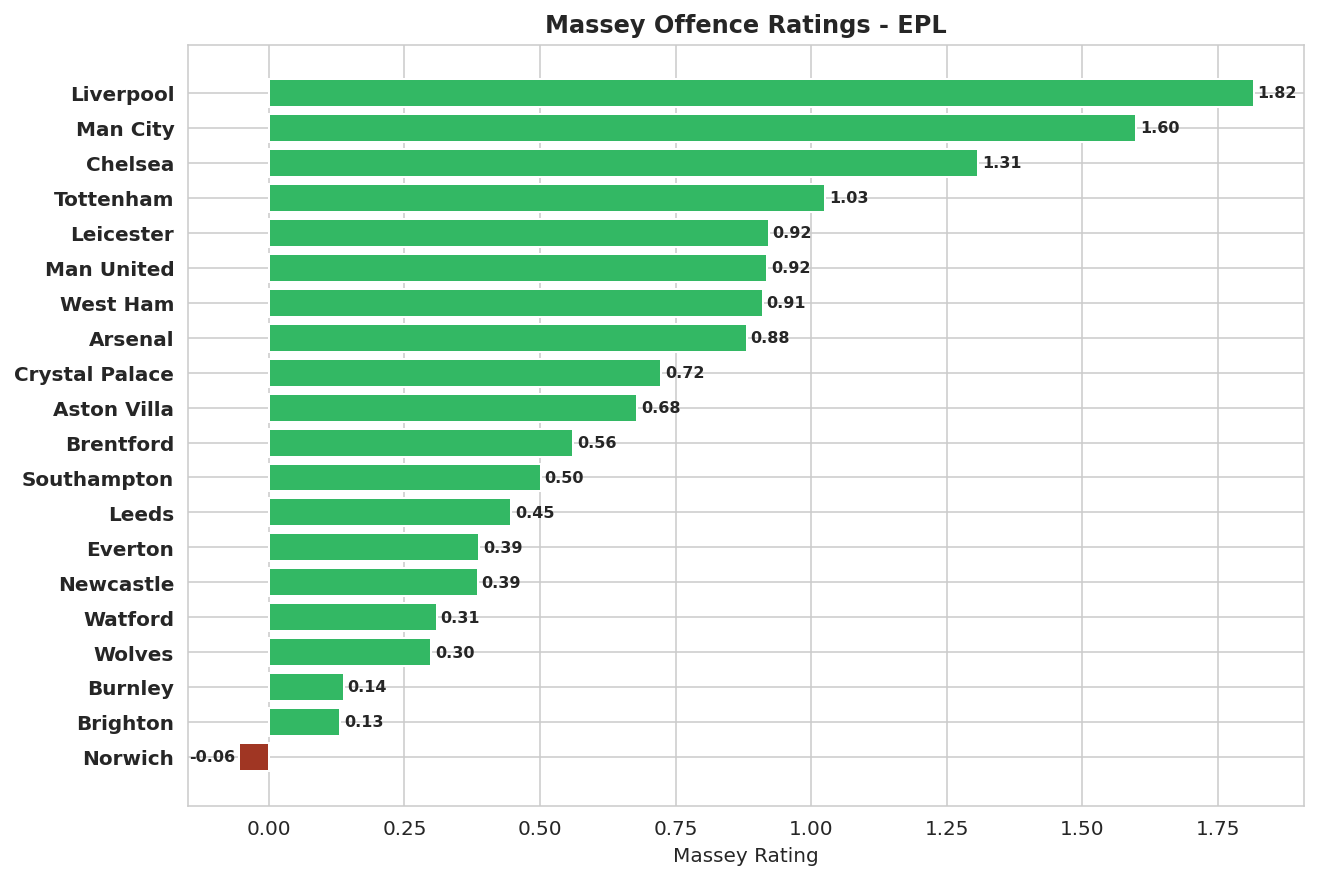

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = [10, 7]
sns.set_style("whitegrid")

ratings = pb.massey.ratings(df["FTHG"], df["FTAG"], df["HomeTeam"], df["AwayTeam"])
ratings["colours"] = np.where(ratings["offence"]> 0, "#33b864", "#a03623")
ratings = ratings.sort_values("offence", ascending=False)
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["offence"]
ax.barh(y_pos, performance, align='center', color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel('Massey Rating')
ax.set_title('Massey Offence Ratings - EPL', fontweight="bold")

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 2
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,
        fontsize=8, fontweight="bold")                      # Horizontally align label differently for
                                    # positive and negative values.

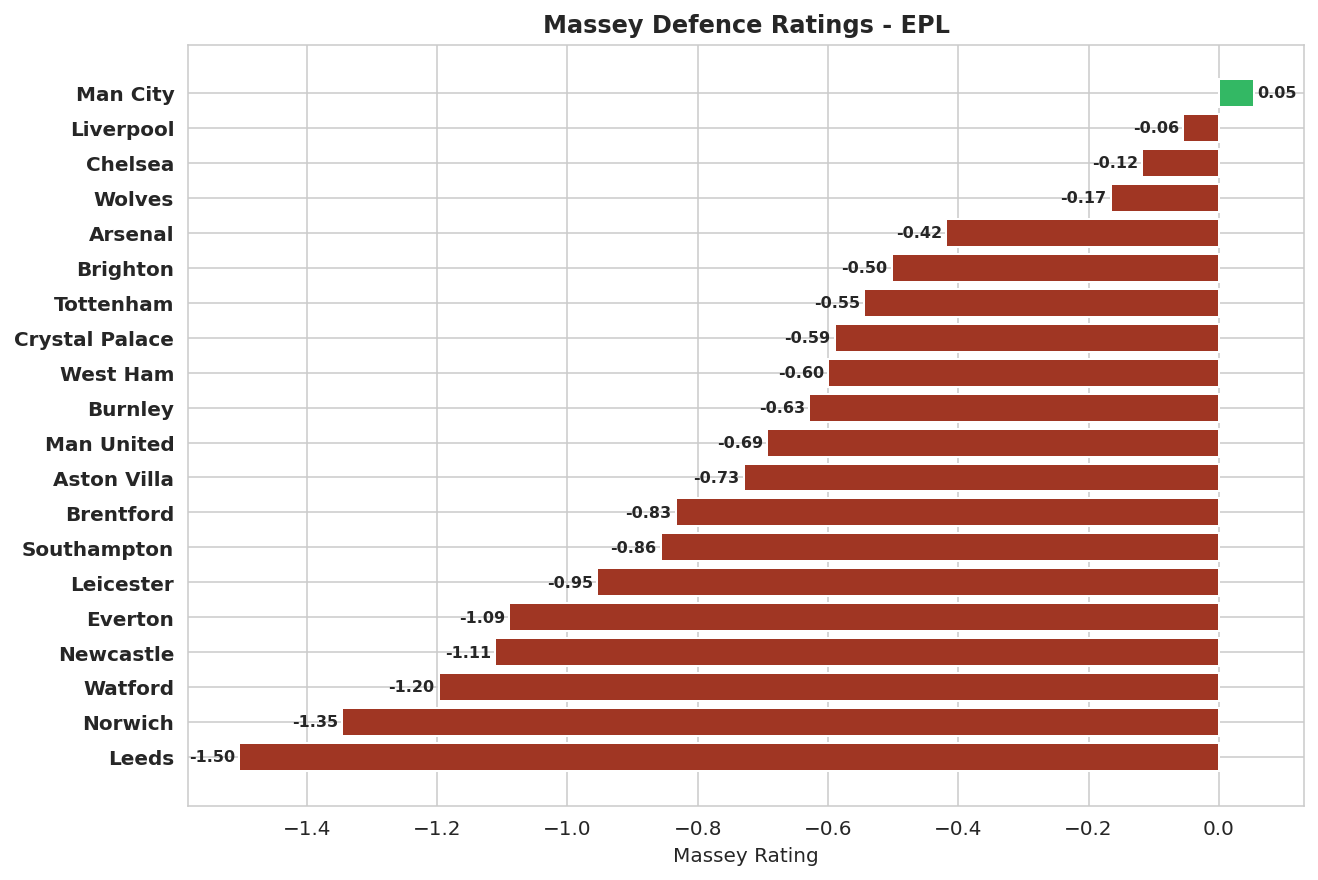

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = [10, 7]
sns.set_style("whitegrid")

ratings = pb.massey.ratings(df["FTHG"], df["FTAG"], df["HomeTeam"], df["AwayTeam"])
ratings["colours"] = np.where(ratings["defence"]> 0, "#33b864", "#a03623")
ratings = ratings.sort_values("defence", ascending=False)
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["defence"]
ax.barh(y_pos, performance, align='center', color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel('Massey Rating')
ax.set_title('Massey Defence Ratings - EPL', fontweight="bold")

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 2
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,
        fontsize=8, fontweight="bold")                      # Horizontally align label differently for
                                    # positive and negative values.